In [3]:
import numpy as np
import pandas as pd
import time

# For plotting
import plotly.io as plt_io
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

#PCA
from sklearn.decomposition import PCA
#TSNE
from sklearn.manifold import TSNE
#UMAP
import umap.umap_ as umap
# #LDA
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.preprocessing import StandardScaler


In [29]:
###Refer to https://towardsdatascience.com/visualizing-dimensionality-reduction-18172a92e5ed

def gen_plot(component1, component2, plt_title):

    x = component1
    y = component2
    
    plt.figure(figsize=(10, 5))
    plt.scatter(x, y, c=[sns.color_palette()[i] for i in train['label']])
    plt.gca().set_aspect('equal', 'datalim')
    plt.title('{} Projection'.format(plt_title), fontsize=24)


In [93]:
def plot_2d_NEW(df, flag, name):
    
    flag = str(flag)

    fig = px.scatter(df, 
                     x="x_component", 
                     y="y_component", 
                        color="label",
                    title="<b> {} </b> Projection of Class <i> {} </i>".format(name, flag))


    fig.update_traces(marker=dict(size=9,
                                line=dict(width=1)),
                selector=dict(mode='markers'))

        
        
    if flag != '0':
        fig.for_each_trace(
            lambda trace: 
                trace.update(opacity=0.1, marker = dict(line_width=0)) if trace.name != flag else (),
        )



    fig.show()

In [85]:
### Refer to https://towardsdatascience.com/dimensionality-reduction-for-data-visualization-pca-vs-tsne-vs-umap-be4aa7b1cb29plot

def plot_2d(component1, component2, name, flag):
    
#     if class_num == 0:
    new_label = y
        
    fig = go.Figure(data=go.Scatter(
            x = component1,
            y = component2,
            mode='markers',
            marker=dict(
                size=15,
                color=new_label, 
                colorscale='Rainbow', 
                showscale=True,
                line_width=0.8
                )
            ))
#     else:
#         new_label = (y == class_num).astype(int)
        
#         fig = go.Figure(data=go.Scatter(
#             x = component1,
#             y = component2,
#             mode='markers',
#             marker=dict(
#                 size=15,
#                 color=new_label,
#                 colorscale="Picnic",
#                 line_width=0.8
#                 )
#             ))
    

    fig.update_layout(margin=dict( l=100,r=100,b=100,t=100),width=1000,height=800) 
    
    fig.update_layout(
    title={
        'text': "<b>2D Diagram - <i> {} </i> </b>".format(name),
        'font' : {
            "family": "Times New Roman",
            "size": 30
        }
    })    
    
    fig.update_layout(hovermode="closest") ###x, x unified, y, u unified
    
    if flag == True:
        fig.update_xaxes(showspikes=True)
        fig.update_yaxes(showspikes=True)
    
    fig.layout.template = 'seaborn'
    
    fig.show()

In [65]:
def plot_3d(component1,component2,component3, name):
    fig = go.Figure(data=[go.Scatter3d(
        x=component1,
        y=component2,
        z=component3,
        mode='markers',
        marker=dict(
            size=10,
            color=y,               
            colorscale='Rainbow',  
            opacity=1,
            showscale=True,
            line_width=1
        )
    )])
    
# tight layout
    fig.update_layout(margin=dict(l=50,r=50,b=50,t=50),width=800,height=600)
    
    fig.update_layout(
        title={
            'text': "<b>3D Diagram - <i> {} </i> </b>".format(name),
            'font' : {
                "family": "Times New Roman",
                "size": 30
            }
    })  
    
    fig.update_layout(hovermode="closest") ###x, x unified, y, u unified
    fig.layout.template = 'plotly_dark'
    
    fig.show()

In [6]:
# train = pd.read_csv('sign_mnist_test.csv')
# # picking only the first 10 labels
# train = train[train['label'] < 10]

# print(len(train))
# print(train.head())
# print(len(train["label"]))


train = pd.read_csv('digit_recognizer_train.csv')
train = train[train['label'] > 0]
train = train.sample(n=3000)



# Setting the label and the feature columns
y = train.loc[:,'label'].values
x = train.loc[:,'pixel0':].values


## Standardizing the data
x = StandardScaler().fit_transform(x)

In [31]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principal = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

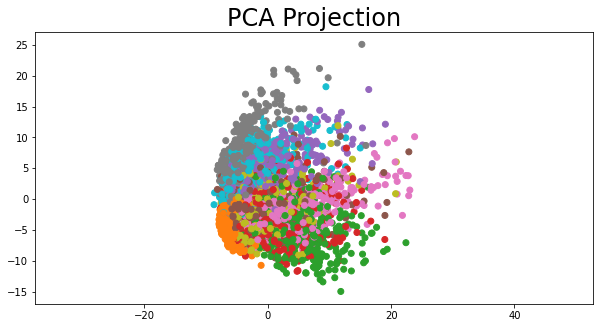

In [32]:
gen_plot(principalComponents[:, 0],principalComponents[:, 1], "PCA")

In [45]:
spike_line = True ### Showing spike line or not

plot_2d(principalComponents[:, 0],principalComponents[:, 1], "PCA", spike_line)

In [94]:
x_components = np.array(principalComponents[:, 0])
y_components = np.array(principalComponents[:, 1])
labels = np.array(y)

df = pd.DataFrame({'label': labels, 'x_component': x_components, 'y_component': y_components}, 
                  columns=['label', 'x_component', 'y_component'])

df['label'] = df['label'].astype(str)

label_to_check = 7 ### Check a specific group (1-9); 0 means no specific group chosen

plot_2d_NEW(df, label_to_check, "PCA")

In [66]:
plot_3d(principalComponents[:, 0],principalComponents[:, 1],principalComponents[:, 2], "PCA")

In [67]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(x)
tsne = TSNE(random_state = 42, n_components=3,verbose=0, perplexity=40, n_iter=400).fit_transform(pca_result_50)

/usr/local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



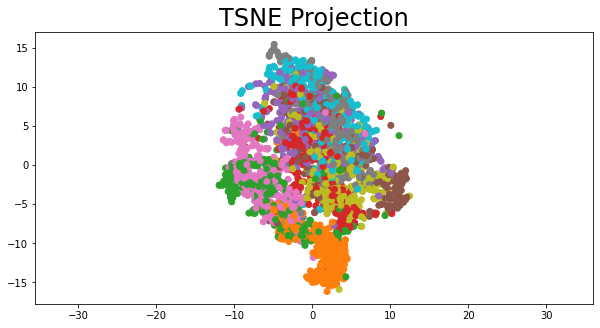

In [69]:
gen_plot(tsne[:, 0],tsne[:, 1], "TSNE")

In [71]:
spike_line = False ### Showing spike line or not

plot_2d(tsne[:, 0],tsne[:, 1], "TSNE", spike_line)

In [95]:
x_components = np.array(tsne[:, 0])
y_components = np.array(tsne[:, 1])
labels = np.array(y)

df = pd.DataFrame({'label': labels, 'x_component': x_components, 'y_component': y_components}, 
                  columns=['label', 'x_component', 'y_component'])

df['label'] = df['label'].astype(str)

label_to_check = 7 ### Check a specific group (1-9); 0 means no specific group chosen

plot_2d_NEW(df, label_to_check, "TSNE")

In [77]:
plot_3d(tsne[:, 0],tsne[:, 1],tsne[:, 2], "TSNE")

In [78]:
reducer = umap.UMAP(random_state=42,n_components=3)
embedding = reducer.fit_transform(x)

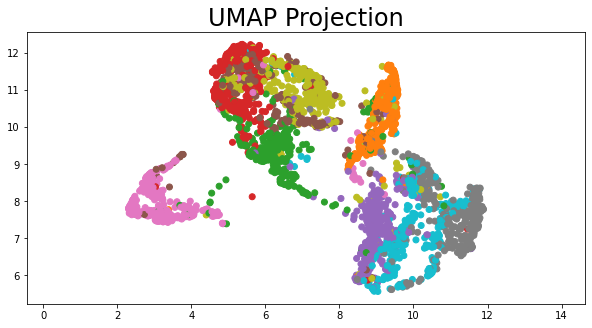

In [79]:
gen_plot(embedding[:, 0],embedding[:, 1], "UMAP")

In [80]:
spike_line = False ### Showing spike line or not

plot_2d(reducer.embedding_[:, 0],reducer.embedding_[:, 1], "UMAP", spike_line)

In [96]:
x_components = np.array(reducer.embedding_[:, 0])
y_components = np.array(reducer.embedding_[:, 1])
labels = np.array(y)

df = pd.DataFrame({'label': labels, 'x_component': x_components, 'y_component': y_components}, 
                  columns=['label', 'x_component', 'y_component'])

df['label'] = df['label'].astype(str)

label_to_check = 7 ### Check a specific group (1-9); 0 means no specific group chosen

plot_2d_NEW(df, label_to_check, "UMAP")

In [97]:
plot_3d(reducer.embedding_[:, 0],reducer.embedding_[:, 1],reducer.embedding_[:, 2], "UMAP")